In [1]:
raise?

Object `raise` not found.


In [125]:
from capstone_01 import Hashing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import importlib; importlib.reload(Hashing) ;

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=10)

from sklearn import tree
clasifier = tree.DecisionTreeClassifier()

np.random.seed(123)  # for reproducibility

In [126]:
X_train, Y_train, X_test, Y_test = Hashing.load__mnist()
#X_train = X_train / 255
#X_test = X_test /   255

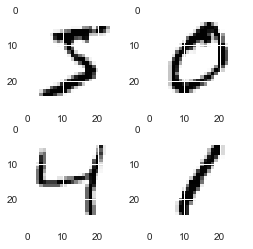

In [128]:
plt.figure(figsize = (4,4))
for idx in range(4):  
    plt.subplot(2,2,idx+1)
    plt.imshow(    X_train[idx] )

In [129]:
X_train_hashed, Rowtrain= Hashing.difference_hash(X_train, size = 8)
X_test_hashed,  Rowtest= Hashing.difference_hash(X_test, size = 8)

In [130]:
clasifier = RFC.fit(X_train_hashed, Y_train)
y_pred = RFC.predict(X_test_hashed)
Hashing.classification_metrics(Y_test, y_pred, verbose = 1)

Classification Report:
             precision    recall  f1-score   support

          0       0.91      0.98      0.94       980
          1       0.96      0.98      0.97      1135
          2       0.91      0.93      0.92      1032
          3       0.88      0.91      0.89      1010
          4       0.92      0.91      0.91       982
          5       0.90      0.88      0.89       892
          6       0.94      0.95      0.95       958
          7       0.94      0.92      0.93      1028
          8       0.90      0.85      0.88       974
          9       0.92      0.88      0.90      1009

avg / total       0.92      0.92      0.92     10000

------------------------------------------------------------
Cohen kappa Score:
0.91095997255
------------------------------------------------------------
Hamming Loss Score:
0.0801


(0.91990000000000005, 0.91095997255032679, 0.080100000000000005)

# Effect of image size

In [14]:
#effect of image size on classification performance
ImageSize = np.array([4,6,8,10,12,16,20,24,28])
Metrics = np.zeros((ImageSize.shape[0], 3 + 1))

for idx_size, size in enumerate(ImageSize):
    #hash
    X_train_hashed, TRAIN = Hashing.difference_hash(X_train, size = size)
    X_test_hashed,  TEST  = Hashing.difference_hash(X_test, size = size)
    #train
    RFC = RFC.fit(X_train_hashed, Y_train)
    # predict
    y_pred = RFC.predict(X_test_hashed)
    classif_metrics = Hashing.classification_metrics(Y_test, y_pred, verbose = 0)
    for idx,metric in enumerate(classif_metrics):
        Metrics[idx_size,idx] = metric
    Metrics[idx_size,-1] = size*(size*2)

In [62]:
import pandas as pd
df = pd.DataFrame(Metrics, columns=['accurracy', 'kappa', 'hamming_loss','Bytes'])
df['Bytes']= (ImageSize*ImageSize*2 )
df = df.set_index(ImageSize)
df

,accurracy,kappa,hamming_loss,Bytes
4,0.8345,0.816025,0.1655,32
6,0.9235,0.914963,0.0765,72
8,0.9220,0.913298,0.0780,128
10,0.9139,0.904290,0.0861,200
12,0.8917,0.879606,0.1083,288
16,0.8609,0.845356,0.1391,512
20,0.8361,0.817784,0.1639,800
24,0.8349,0.816441,0.1651,1152
28,0.8152,0.794533,0.1848,1568


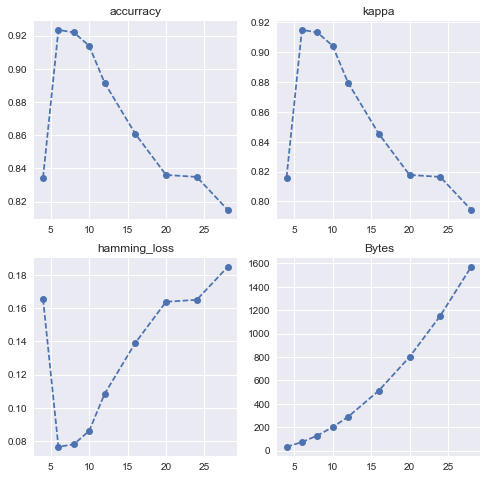

In [63]:
plt.figure(figsize = (8,8))
for idx,C in enumerate(df.columns):
    y = df[C].values
    plt.subplot(2,2,idx+1)
    plt.plot(ImageSize,y,'o--')
    plt.title(C)

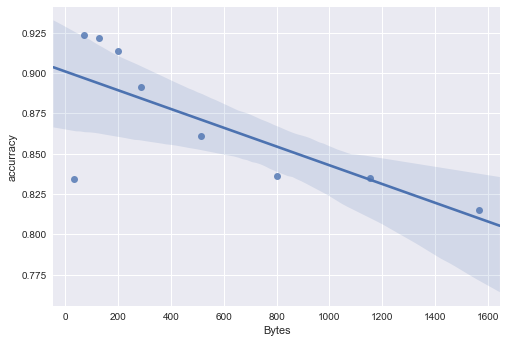

In [66]:
import seaborn as sns
sns.regplot(x="Bytes", y="accurracy", data=df)

accurracy
kappa
hamming_loss


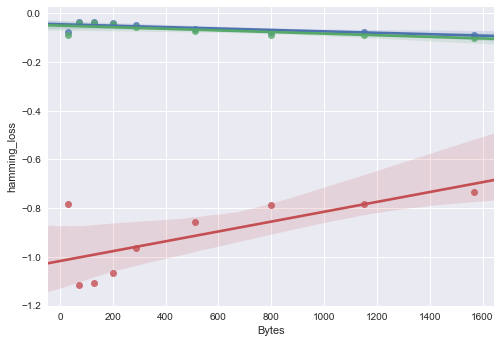

In [84]:
for C in df.columns[0:3]:
    print(C)
    sns.regplot(x=df['Bytes'], y= df[C].apply(np.log10), data=df)

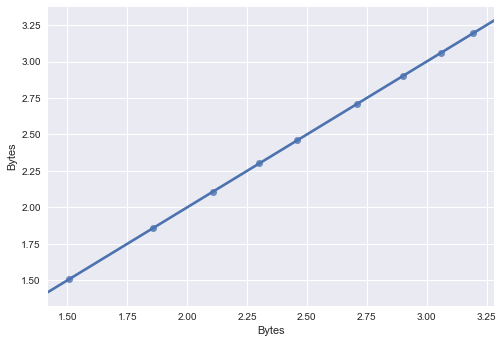

In [79]:
sns.regplot(x=df['Bytes'].apply(np.log10), y= df[C].apply(np.log10), data=df)